<p style="text-align: center;" ><font size="+3"><u><b>Laboratory 3 Part 2: Linear Systems Theory Applied to Optical Imaging Systems</u></b></p>

<p style="text-align: left;" ><font size="+1"><b>Group #: ___________   Team Members: _______________  </b></p>

<p style="text-align: left;" ><font size="+1"><b>Measure the Point Spread Function of a Microscope</b></p>

<div class="alert alert-block alert-warning">
<font color='black'>

The microscope has been set up using 8” of optical tube (plus the filter wheel and aperture). We have placed two targets on the stage - the resolution target and a pinhole target. In addition, the glass diffuser have been removed from setup. Instead, as shown in the photo below, a piece of plastic has been placed underneath the resolution target to function as the diffuser. 
     </font> 
</div>

<img src="stage.png" style="width:500px">

<div class="alert alert-block alert-success">
<font color='black'>
1. Move the stage to find the resolution target. As you have done previously, compute the pixel size, magnification, and sampling frequency and report below:
         </font> 
</div>

In [1]:
# Import and instantiate all classes
from lighting import Lighting
from pololu import Pololu
from camera import Camera

l = Lighting()
m = Pololu()
c = Camera()
l.set_intensity(10)
c.open()
f_wheel,stage_y,stage_x,ap,stage_z = 1,2,3,4,5
m.set_position(ap, 2496, blocking = True) # wide aperture

# computer: imaging-5
c.set_exposure(10)

Light control initialized successfully.
Servo control initialized successfully.
Load uc480 library..
ThorCam opened successfully.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

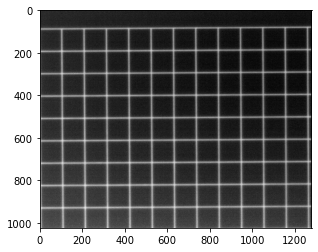

In [49]:
m.set_position(stage_x,2496, blocking = True)
m.set_position(stage_z, 1500, blocking = True) # best z = 1500
m.set_position(stage_y, 700, blocking = True)
m.set_position(ap, 2496)
img = c.capture().copy()
plt.figure()
plt.imshow(img, cmap='gray')


In [50]:
np.save("Lab3_Grid.npy", img)

In [69]:
plt.figure()
x = plt.imshow(np.load('Lab3_Grid.npy'),cmap='gray')
plt.colorbar(x, shrink=0.8)
plt.title("Grid Image")
plt.xlabel("x pixels")
plt.ylabel("y pixels")

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Text(0, 0.5, 'y pixels')

104 pixels per 100 micrometer segment. 
$\frac{100 \mu m}{104  pixels} = 0.96 \frac{\mu m}{pixel}$

$M = \frac{5.3}{0.96} = 5.51$

The magnification is 5.51 X.

<div class="alert alert-block alert-warning">
<font color='black'>

Now find the pinhole. The pinhole lets through very little light and can be difficult to find. Thus, you will go through a very specific process to be able to find the pinhole and collect good data. <br/> <br/>

First, set your system to the “no filter” setting. Turn up the LED illuminator to the maximum setting. Also, the illuminator will get warm while in use. Remember to turn off the illuminator after each data collection.<br/><br/>

Set the camera exposure to something long like 1000 ms. (To do this you will likely need to reduce the framerate below 1 frame/second by setting `c.set_framerate()`). You may need to tweak this exposure setting to get good (unsaturated) data. Set up your system in a continuous display loop as you have in previous labs and start searching for the pinhole. Having your axes aligned and moving slowly will be critical to find the pinhole. Similarly, you will need to be somewhat close to focus in order to see the pinhole. In this lab, it may be helpful to use `cmap='jet'` to visualize your data.<br/><br/>
    
Once you have found the pinhole, change your live image to display only a 200 x 200 pixel region around the pinhole. Change the filter to filter 2 (“green” 540 nm). Attempt to get the image focused as best as you can. If the image is saturated, adjust the exposure accordingly. <br/><br/>
    
You may notice that the background isn’t entirely dark. Recall from Lab 1 that even when no light hits the detector you can read non-zero values. We will need to correct for this. Without changing any part of the setup, turn off the illuminator from the wall and collect 50 dark frames to subtract from your data. (We will not be conducting an air scan to normalize the data.) Turn the illuminator back on when finished.

</font> 
</div>

<div class="alert alert-block alert-success">
<font color='black'>

2. Center your pinhole as best as you can within a 200 x 200 zoomed image at the best focus you can achieve. (Hint, the best focus will have the highest value at the center of the pinhole.) Average 100 images to obtain an image of your pinhole. <br/><br/>  
    
Paste that image below. Additionally, re-window (using caxis) your data to show as many sidelobes as you can in your data, and show that image as well.  Also, save your data (e.g. `np.save('wide_aperture.npy', mean_image)`).
</font> 
</div>

In [13]:
l.set_intensity(63)
c.set_exposure(250)
m.set_position(stage_x, 750, blocking=True)
m.set_position(stage_y, 1050, blocking=True)
m.set_position(stage_z, 1600, blocking=True)
m.set_position(f_wheel, 1170, blocking=True)

imgs = []
for i in range(100):
    imgs.append(c.capture().copy()[325:525,415:615])
pinhole = np.stack(imgs)
pinhole = np.mean(pinhole, axis = 0) 
np.save("AvgPinhole.npy", pinhole)

Text(0, 0.5, 'y position values (mm)')

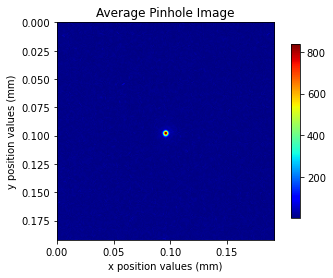

In [14]:
%matplotlib inline

p = np.load("AvgPinhole.npy")
x=plt.imshow(p, cmap='jet',extent=[0,200*0.96/1000,200*0.96/1000,0])
plt.colorbar(x,shrink=0.8)
plt.title("Average Pinhole Image")
plt.xlabel("x position values (mm)")
plt.ylabel("y position values (mm)")

In [19]:
l.set_intensity(0)
dark = []
for i in range(50):
    dark.append(c.capture().copy()[325:525,415:615])
D = np.stack(dark)
D = np.mean(D, axis = 0) 
np.save("Dark", D)

Text(0, 0.5, 'y position values (mm)')

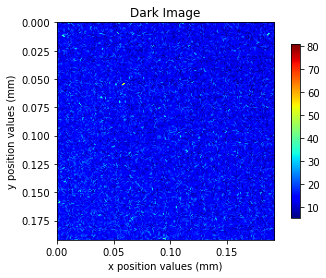

In [20]:
%matplotlib inline

d = np.load("Dark.npy")
x=plt.imshow(d, cmap='jet',extent=[0,200*0.96/1000,200*0.96/1000,0])
plt.colorbar(x,shrink=0.8)
plt.title("Dark Image")
plt.xlabel("x position values (mm)")
plt.ylabel("y position values (mm)")

In [21]:
p = np.load("AvgPinhole.npy")
d = np.load("Dark.npy")
p = p-d
np.save("wide_aperture", p)

Text(0, 0.5, 'y position values (mm)')

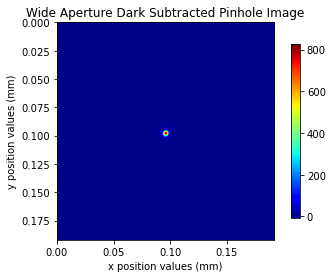

In [22]:
%matplotlib inline

p = np.load("wide_aperture.npy")
x=plt.imshow(p, cmap='jet',extent=[0,200*0.96/1000,200*0.96/1000,0])
plt.colorbar(x, shrink=0.8)
plt.title("Wide Aperture Dark Subtracted Pinhole Image")
plt.xlabel("x position values (mm)")
plt.ylabel("y position values (mm)")

(0.11, 0.085)

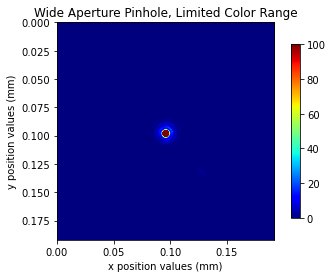

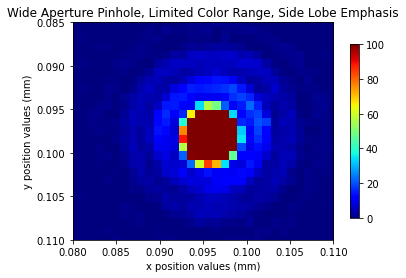

In [26]:
# %matplotlib inline
p = np.load("wide_aperture.npy")
x=plt.imshow(p, cmap='jet', clim=[0,100],extent=[0,200*0.96/1000,200*0.96/1000,0])
plt.colorbar(x, shrink=0.8)
plt.title("Wide Aperture Pinhole, Limited Color Range")
plt.xlabel("x position values (mm)")
plt.ylabel("y position values (mm)")
plt.figure()
x=plt.imshow(p, cmap='jet', clim=[0,100],extent=[0,200*0.96/1000,200*0.96/1000,0])
plt.colorbar(x, shrink=0.8)
plt.title("Wide Aperture Pinhole, Limited Color Range, Side Lobe Emphasis")
plt.xlabel("x position values (mm)")
plt.ylabel("y position values (mm)")
plt.xlim(.08,.11)
plt.ylim(.11,.085)

<div class="alert alert-block alert-success">
<font color='black'>

3. Repeat the above experiment with two additional aperture settings (medium and small). (Note that you should not have to change focus, but changing the exposure time will require new dark frame data.) Save `medium_aperture.npy` and `small_aperture.npy` as well. 
</font> 
</div>

<img src="Lab3\aperture.png" style="width:800px">
Example aperture position: wide open (100% open), medium aperture (60% open), small aperture (30% open)

In [27]:
l.set_intensity(63)
c.set_exposure(250)
m.set_position(ap, 1500)
m.set_position(stage_x, 750, blocking=True)
m.set_position(stage_y, 1050, blocking=True)
m.set_position(stage_z, 1600, blocking=True)
m.set_position(f_wheel, 1170, blocking=True)
imgs = []
for i in range(100):
    imgs.append(c.capture().copy()[325:525,415:615])
pinhole = np.stack(imgs)
pinhole = np.mean(pinhole, axis = 0) 

l.set_intensity(0)
dark = []
for i in range(50):
    dark.append(c.capture().copy()[325:525,415:615])
D = np.stack(dark)
D = np.mean(D, axis = 0) 
med_ap = pinhole-D
np.save("medium_aperture", med_ap)

Text(0, 0.5, 'y position values (mm)')

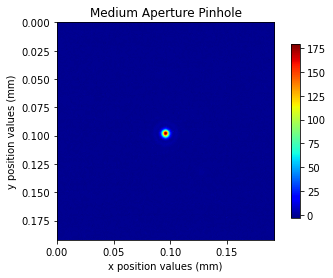

In [28]:
%matplotlib inline
med = np.load("medium_aperture.npy")
x=plt.imshow(med, cmap='jet',extent=[0,200*0.96/1000,200*0.96/1000,0])
plt.colorbar(x, shrink=0.8)
plt.title("Medium Aperture Pinhole")
plt.xlabel("x position values (mm)")
plt.ylabel("y position values (mm)")

In [41]:
l.set_intensity(63)
c.set_exposure(400)
m.set_position(ap, 1100)
m.set_position(stage_x, 750, blocking=True)
m.set_position(stage_y, 1050, blocking=True)
m.set_position(stage_z, 1600, blocking=True)
m.set_position(f_wheel, 1170, blocking=True)
imgs = []
for i in range(100):
    imgs.append(c.capture().copy()[325:525,415:615])
pinhole = np.stack(imgs)
pinhole = np.mean(pinhole, axis = 0) 

l.set_intensity(0)
dark = []
for i in range(50):
    dark.append(c.capture().copy()[325:525,415:615])
D = np.stack(dark)
D = np.mean(D, axis = 0) 
small_ap = pinhole-D
np.save("small_aperture", small_ap)

Text(0, 0.5, 'y position values (mm)')

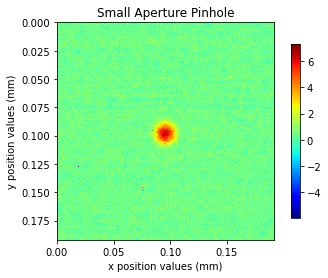

In [42]:
%matplotlib inline
small = np.load("small_aperture.npy")
x=plt.imshow(small, cmap='jet',extent=[0,200*0.96/1000,200*0.96/1000,0])
plt.colorbar(x, shrink=0.8)
plt.title("Small Aperture Pinhole")
plt.xlabel("x position values (mm)")
plt.ylabel("y position values (mm)")

<div class="alert alert-block alert-success">
<font color='black'>

4. Show the averaged, 200 x 200 images (both normal and “zoomed” caxis) below. Discuss the effect of aperture on the appearance of the pinhole.
</font> 
</div>

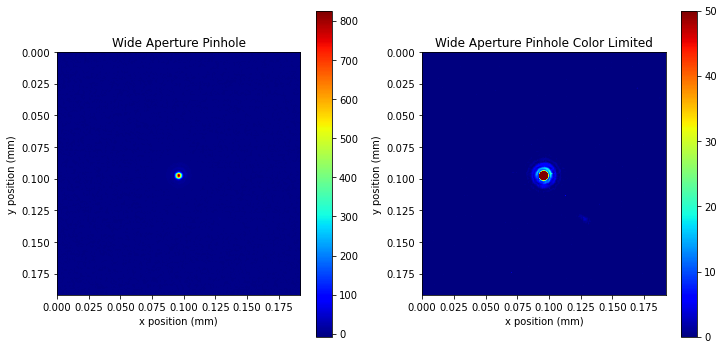

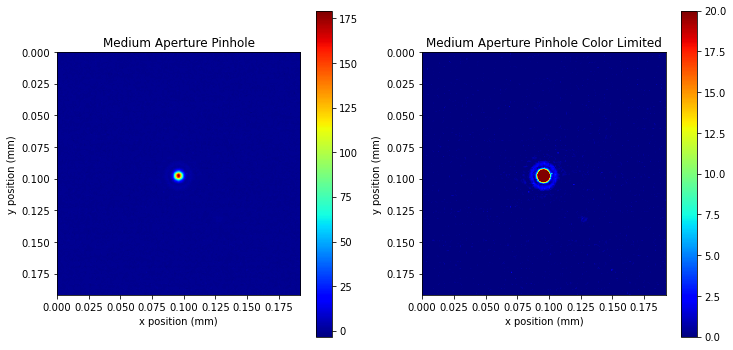

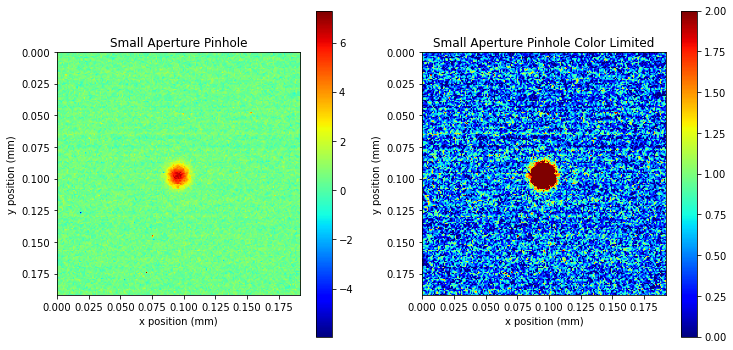

In [75]:
%matplotlib inline
def generate_lobe_image(input_file_name, figure_title, color_limit):
    fig, ax = plt.subplots(ncols=2,figsize=(12,12))
    s = np.load(input_file_name)
    left = np.ravel(ax)[0].imshow(s,cmap='jet',extent=[0,200*0.96/1000,200*0.96/1000,0])
    ax[0].set_title(figure_title)
    ax[0].set_xlabel("x position (mm)")
    ax[0].set_ylabel("y position (mm)")
    plt.colorbar(left,ax=np.ravel(ax)[0],shrink=0.5)
    right = np.ravel(ax)[1].imshow(np.load(input_file_name),cmap='jet',clim=[0,color_limit],extent=[0,200*0.96/1000,200*0.96/1000,0])
    ax[1].set_title(figure_title + " Color Limited")
    ax[1].set_xlabel("x position (mm)")
    ax[1].set_ylabel("y position (mm)")
    plt.colorbar(right,ax=np.ravel(ax)[1],shrink=0.5)
generate_lobe_image('wide_aperture.npy', 'Wide Aperture Pinhole',50)
generate_lobe_image('medium_aperture.npy', 'Medium Aperture Pinhole',20)
generate_lobe_image('small_aperture.npy', 'Small Aperture Pinhole',2)

As we decrease the aperture size, the image gets blurier and makes the size of the pinhole appears larger. The image of the pinhole represents the point spread function (PSF) of the system and the aperture size specifies the Pupil function. The PSF is equal to the fourier transform of the autocorrelation of the pupil function. When you decrease the aperture size, the spread of the pupil function decreases which explains why the spread and bluriness of the PSF increases.

<div class="alert alert-block alert-success">
<font color='black'>

5. For your 3 data sets above (you saved data for wide, medium, and small apertures), estimate the diameter of the first dark ring around your pinhole images. Report each below with units:
</font> 
</div>

In [70]:
#%matplotlib inline
%matplotlib widget

wide = plt.imshow(np.load('wide_aperture.npy'),cmap='jet',clim=[0,50],extent=[0,200*0.96/1000,200*0.96/1000,0])
plt.title('Wide Aperture Pinhole Zoomed In')
plt.xlabel("x position values (mm)")
plt.ylabel("y position values (mm)")
plt.colorbar(wide,shrink=0.5)
plt.xlim(0.085,0.11)
plt.ylim(.115,.085)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(0.115, 0.085)

In [76]:
# %matplotlib inline
%matplotlib widget

medium = plt.imshow(np.load('medium_aperture.npy'),cmap='jet',clim=[0,20],extent=[0,200*0.96/1000,200*0.96/1000,0])
plt.title('Medium Aperture Pinhole Zoomed In')
plt.xlabel("x position values (mm)")
plt.ylabel("y position values (mm)")
plt.colorbar(medium,shrink=0.5)
plt.xlim(0.085,0.11)
plt.ylim(.115,.085)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(0.115, 0.085)

In [81]:
#%matplotlib inline
%matplotlib widget

small = plt.imshow(np.load('small_aperture.npy'),cmap='jet',clim=[0,5],extent=[0,200*0.96/1000,200*0.96/1000,0])
plt.title('Small Aperture Pinhole Zoomed In')
plt.xlabel("x position values (mm)")
plt.ylabel("y position values (mm)")
plt.colorbar(small,shrink=0.5)
plt.xlim(0.055,0.13)
plt.ylim(.135,.065)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(0.135, 0.065)

Wide Aperture: $d = 0.0146 mm$

Medium Aperture: $d = 0.0153 mm $

Small Aperture: $d = 0.0232 mm$

<div class="alert alert-block alert-success">
<font color='black'>

6. For your 3 data sets above, show the absolute value of the Fourier transform of your data using `ax.plot_surface()`. What are you looking at? Describe what you see and estimate the “diameter” of the function you observe. (Note: If you have a “spike” at your DC value, talk to the instructors for a remedy.) </font> 
</div>

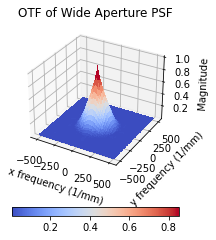

In [8]:
s = np.load('wide_aperture.npy')
low = s[0:50,0:50]
norm = s - np.mean(low)
norm = norm / np.sum(norm)
transformed_func = fftshift(fft2(ifftshift(norm)))
 
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Make data.
fs = 104 / 100 * 1000
X = np.linspace(-fs/2,fs/2*(200-2)/200,200)
Y = np.linspace(-fs/2,fs/2*(200-2)/200,200)
X, Y = np.meshgrid(X, Y)
#R = np.sqrt(X**2 + Y**2)
Z = np.abs(transformed_func)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=20, orientation='horizontal')
ax.set_xlabel('x frequency (1/mm)')
ax.set_ylabel('y frequency (1/mm)')
ax.set_zlabel('Magnitude')
ax.set_title('OTF of Wide Aperture PSF')
plt.show()

Text(0, 0.5, 'y frequency (1/mm)')

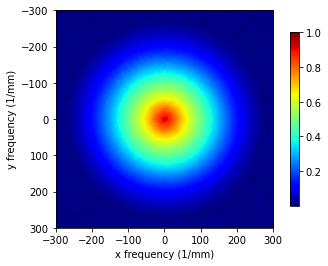

In [9]:
%matplotlib inline
x=plt.imshow(Z,cmap='jet',extent=[-fs/2,fs/2*(200-2)/200,fs/2*(200-2)/200,-fs/2])
plt.colorbar(x, shrink=0.8)
plt.xlim(-300,300)
plt.ylim(300,-300)
plt.xlabel('x frequency (1/mm)')
plt.ylabel('y frequency (1/mm)')

$d = 2 * r = 2* 262.1 = 524.1$

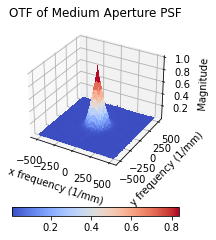

In [2]:
%matplotlib inline
from numpy.fft import fft2, fftshift, ifftshift
from matplotlib import cm
from matplotlib.ticker import LinearLocator

s = np.load('medium_aperture.npy')
low = s[0:50,0:50]
norm = s - np.mean(low)
norm = norm / np.sum(norm)
transformed_func = fftshift(fft2(ifftshift(norm)))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Make data.
fs = 104 / 100 * 1000
X = np.linspace(-fs/2,fs/2*(200-2)/200,200)
Y = np.linspace(-fs/2,fs/2*(200-2)/200,200)
X, Y = np.meshgrid(X, Y)
#R = np.sqrt(X**2 + Y**2)
Z = np.abs(transformed_func)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=20, orientation='horizontal')
ax.set_xlabel('x frequency (1/mm)')
ax.set_ylabel('y frequency (1/mm)')
ax.set_zlabel('Magnitude')
ax.set_title('OTF of Medium Aperture PSF')
plt.show()

Text(0, 0.5, 'y frequency (1/mm)')

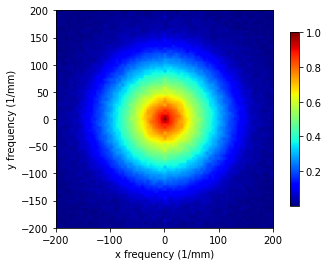

In [4]:
%matplotlib inline
x=plt.imshow(Z,cmap='jet',extent=[-fs/2,fs/2*(200-2)/200,fs/2*(200-2)/200,-fs/2])
plt.colorbar(x, shrink=0.8)
plt.xlim(-200, 200)
plt.ylim(-200, 200)
plt.xlabel('x frequency (1/mm)')
plt.ylabel('y frequency (1/mm)')

$ d = 2 * r = 2 * 156 = 312$

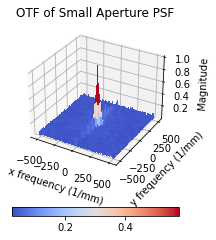

In [5]:
s = np.load('small_aperture.npy')
low = s[0:50,0:50]
norm = s - np.mean(low)
norm = norm / np.sum(norm)
transformed_func = fftshift(fft2(ifftshift(norm)))

fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Make data.
fs = 104 / 100 * 1000
X = np.linspace(-fs/2,fs/2*(200-2)/200,200)
Y = np.linspace(-fs/2,fs/2*(200-2)/200,200)
X, Y = np.meshgrid(X, Y)
Z = np.abs(transformed_func)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=20, orientation='horizontal')
ax.set_xlabel('x frequency (1/mm)')
ax.set_ylabel('y frequency (1/mm)')
ax.set_zlabel('Magnitude')
ax.set_title('OTF of Small Aperture PSF')
plt.show()

Text(0, 0.5, 'y frequency (1/mm)')

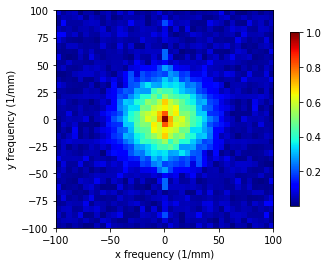

In [6]:
%matplotlib inline
x=plt.imshow(Z,cmap='jet',extent=[-fs/2,fs/2*(200-2)/200,fs/2*(200-2)/200,-fs/2])
plt.colorbar(x, shrink=0.8)
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.xlabel('x frequency (1/mm)')
plt.ylabel('y frequency (1/mm)')

$d = 2 * r = 2 * 63.3 = 126.6$

Text(0.5, 1.0, 'Diameter of Observed Function vs Aperture Size Setting')

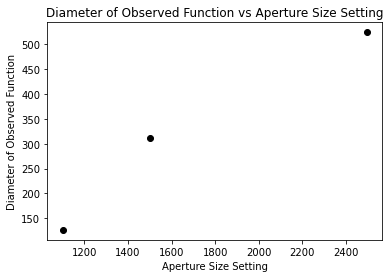

In [49]:
%matplotlib inline
aperture_settings = [2496, 1500, 1100]
diameters = [262.1*2,156*2,63.3*2]
plt.figure()
plt.plot(aperture_settings,diameters,'o',color='black')
plt.xlabel("Aperture Size Setting")
plt.ylabel("Diameter of Observed Function")
plt.title("Diameter of Observed Function vs Aperture Size Setting")

The radii of each the function for each of the aperture settings are as follows: 

Wide: $r = 262.1$

Medium: $r = 156$

Small: $r = 63.3$

As shown in the scatterplot above, the aperture size used to take the image of the pinhole is positively correlated with the diameter of the observed function. 

<div class="alert alert-block alert-success">
<font color='black'>

7. Return to the wide open aperture scenario with a centered pinhole, 200 x 200 image and switch to filter 1 ("blue" 460 nm). Choose an appropriate exposure and dark-correct your data. **Show** a best-focus image, windowed image to see sidelobes, and the magnitude of the Fourier transform of this image. Save your image data. Additionally, estimate the diameter of the first dark ring in the image and the diameter of the Fourier-domain function. Show all of this below and discuss the relation to the in-focus filter 2 case.  </font> 
</div>

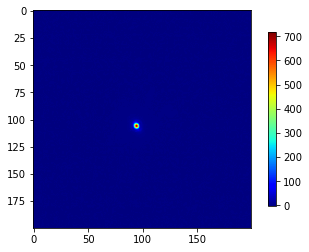

In [165]:
l.set_intensity(63)
c.set_exposure(250)
m.set_position(ap, 2496, blocking = True)
m.set_position(stage_x, 750, blocking=True)
m.set_position(stage_y, 1050, blocking=True)
m.set_position(stage_z, 1700, blocking=True) # 1700 good for blue
m.set_position(f_wheel, 1270, blocking=True)

imgs = []
for i in range(100):
    imgs.append(c.capture().copy()[450:650,385:585])
pinhole = np.stack(imgs)
pinhole = np.mean(pinhole, axis = 0) 

l.set_intensity(0)
dark = []
for i in range(50):
    dark.append(c.capture().copy()[450:650,385:585])
D = np.stack(dark)
D = np.mean(D, axis = 0) 
blue_wide_ap = pinhole  -D
np.save("blue_wide_ap", blue_wide_ap)

x = plt.imshow(blue_wide_ap,cmap='jet')
plt.colorbar(x, shrink=0.8)

Text(0, 0.5, 'y position values (mm)')

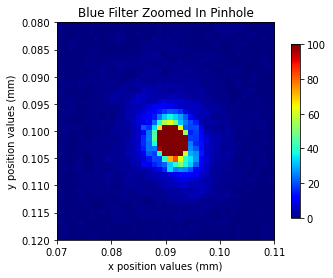

In [17]:
%matplotlib inline
blue_wide_ap = np.load('blue_wide_ap.npy')
x = plt.imshow(blue_wide_ap,cmap='jet',clim=[0,100],extent=[0,200*0.96/1000,200*0.96/1000,0])
plt.colorbar(x,shrink=0.8)
plt.xlim(0.07,0.11)
plt.ylim(.12,.08)
plt.title('Blue Filter Zoomed In Pinhole')
plt.xlabel("x position values (mm)")
plt.ylabel("y position values (mm)")

$d = 2 * r = 0.008529 mm = 0.017058 mm$


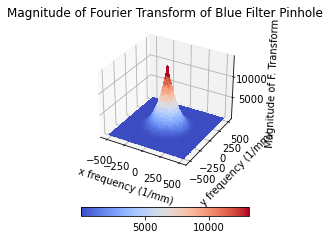

In [18]:
%matplotlib inline
transformed_func = fftshift(fft2(ifftshift(blue_wide_ap)))
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
# Make data.
fs = 104 / 100 * 1000
X = np.linspace(-fs/2,fs/2*(200-2)/200,200)
Y = np.linspace(-fs/2,fs/2*(200-2)/200,200)
X, Y = np.meshgrid(X, Y)
Z = np.abs(transformed_func)
# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=20, orientation='horizontal')
ax.set_xlabel('x frequency (1/mm)')
ax.set_ylabel('y frequency (1/mm)')
ax.set_zlabel('Magnitude of F. Transform')
ax.set_title('Magnitude of Fourier Transform of Blue Filter Pinhole')
plt.show()

Text(0, 0.5, 'y frequency (1/mm)')

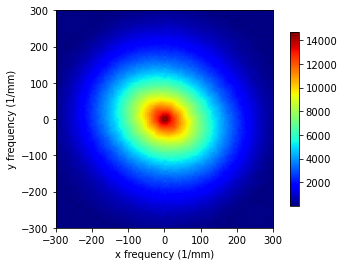

In [44]:
%matplotlib inline
x=plt.imshow(Z,cmap='jet',extent=[-fs/2,fs/2*(200-2)/200,fs/2*(200-2)/200,-fs/2])
plt.colorbar(x, shrink=0.8)
plt.xlim(-300,300)
plt.ylim(-300,300)
plt.xlabel('x frequency (1/mm)')
plt.ylabel('y frequency (1/mm)')

$d = r * 2 = 264.5 * 2 = 529.0$

<div class="alert alert-block alert-success">
<font color='black'>

8. Defocus your pinhole image at three different levels of defocus (showing different ring behavior around the pinhole). Average 100 frames, save this data and show below. Describe general trends in the defocused data. </font> 
</div>

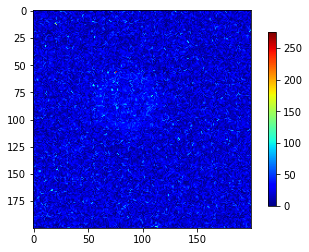

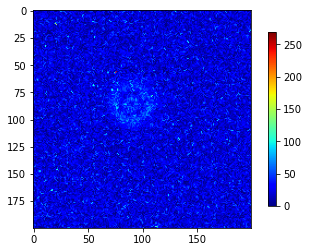

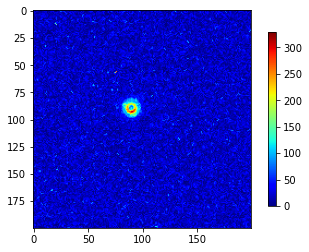

In [30]:
z_pos = [2300, 2150, 1900]
blur_imgs = []
l.set_intensity(0)
dark = []
for i in range(50):
    dark.append(c.capture().copy()[325:525,400:600])
D = np.stack(dark)
D = np.mean(D, axis = 0) 

l.set_intensity(30)
for z in z_pos:
    m.set_position(stage_z, z, blocking = True)
    temp_blur_imgs = []
    for i in range(100):
        temp_blur_imgs.append(c.capture().copy()[325:525,400:600])
    avg = np.stack(temp_blur_imgs)
    avg = np.mean(avg, axis = 0) 
    blur_imgs.append(avg)
for i in range(len(blur_imgs)):
    blue_defoc = blur_imgs[i] -D
    np.save("blue_defoc" + str(i), blue_wide_ap)
    plt.figure()
    x = plt.imshow(blur_imgs[i],cmap='jet')
    plt.colorbar(x, shrink=0.8)
    


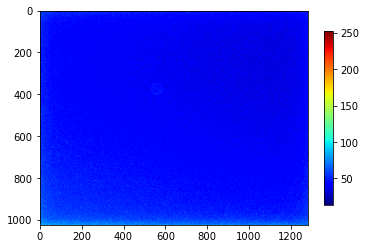

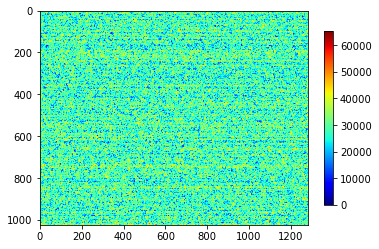

In [21]:
%matplotlib inline

m.set_position(ap, 2496, blocking = True)
m.set_position(stage_x, 750, blocking=True)
m.set_position(stage_y, 1050, blocking=True)
m.set_position(stage_z, 2300, blocking=True) # 1700 good for blue
m.set_position(f_wheel, 1270, blocking=True)

c.set_exposure(500)
l.set_intensity(0)
d = c.capture().copy()


l.set_intensity(63)
img = c.capture().copy()
x = plt.imshow(img, cmap='jet')
plt.colorbar(x, shrink=0.8)

plt.figure()
d = c.capture().copy()
x = plt.imshow(img - d, cmap='jet')
plt.colorbar(x, shrink=0.8)

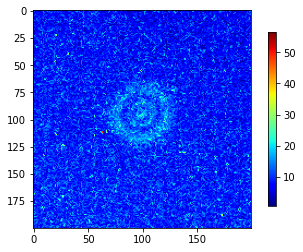

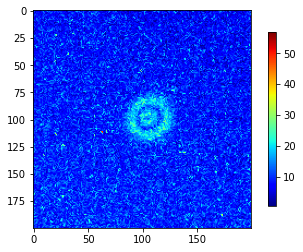

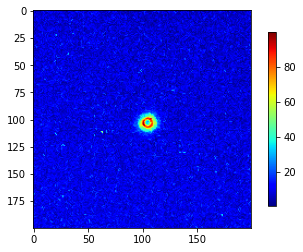

In [193]:
c.set_exposure(250)
z_pos = [2300, 2150, 1900]
blur_imgs = []
l.set_intensity(0)
dark = []
for i in range(50):
    dark.append(c.capture().copy()[450:650,385:585])
D = np.stack(dark)
D = np.mean(D, axis = 0) 

l.set_intensity(63)
for z in z_pos:
    m.set_position(stage_z, z, blocking = True)
    temp_blur_imgs = []
    for i in range(100):
        temp_blur_imgs.append(c.capture().copy()[450:650,385:585])
    avg = np.stack(temp_blur_imgs)
    avg = np.mean(avg, axis = 0) 
    blur_imgs.append(avg)
for i in range(len(blur_imgs)):
    blue_defoc = blur_imgs[i] -D
    np.save("blue_defoc" + str(i), blue_defoc)
    plt.figure()
    x = plt.imshow(blur_imgs[i],cmap='jet')
    plt.colorbar(x, shrink=0.8)
    


Text(0, 0.5, 'y position values (mm)')

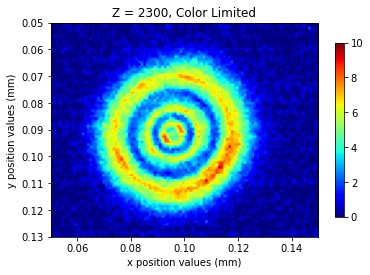

In [41]:
%matplotlib inline
x = plt.imshow(np.load('blue_defoc0.npy'),clim=[0,10],cmap='jet',extent=[0,200*0.96/1000,200*0.96/1000,0])
plt.colorbar(x,shrink=0.8)
plt.xlim(0.05,0.15)
plt.ylim(0.13, 0.05)
plt.title("Z = 2300, Color Limited")
plt.xlabel("x position values (mm)")
plt.ylabel("y position values (mm)")

Text(0, 0.5, 'y position values (mm)')

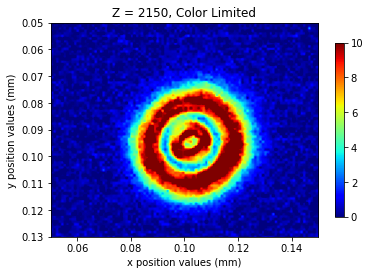

In [40]:
%matplotlib inline
x = plt.imshow(np.load('blue_defoc1.npy'),clim=[0,10],cmap='jet',extent=[0,200*0.96/1000,200*0.96/1000,0])
plt.colorbar(x,shrink=0.8)
plt.xlim(0.05,0.15)
plt.ylim(0.13, 0.05)
plt.title("Z = 2150, Color Limited")
plt.xlabel("x position values (mm)")
plt.ylabel("y position values (mm)")

Text(0, 0.5, 'y position values (mm)')

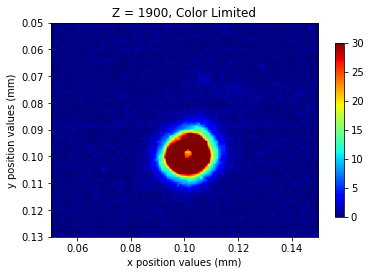

In [39]:
%matplotlib inline
x = plt.imshow(np.load('blue_defoc2.npy'),clim=[0,30],cmap='jet',extent=[0,200*0.96/1000,200*0.96/1000,0])
plt.colorbar(x,shrink=0.8)
plt.xlim(0.05,0.15)
plt.ylim(0.13, 0.05)
plt.title("Z = 1900, Color Limited")
plt.xlabel("x position values (mm)")
plt.ylabel("y position values (mm)")

- diameter
- slowly getting more focused 
- the more focused, the smaller the diameter, the greater the intensity
- more contrast in the widest visible ring

<div class="alert alert-block alert-success">
<font color='black'>

9. Move the stage to center your microscope on the center of the star pattern. Acquire a best focus image at good exposures for both filter 1 and filter 3 ("orange" 600 nm) using a 200 x 200 zoomed image region. Show both images and describe what you see – note any differences and interpret the data in light of the other experiments you have conducted.  </font> 
</div>

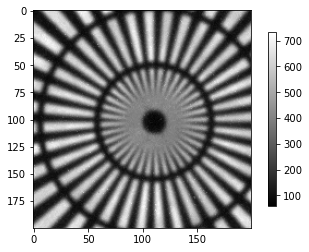

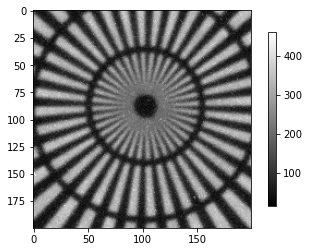

In [65]:
l.set_intensity(63)
c.set_exposure(750)
m.set_position(stage_x,1925, blocking = True)
m.set_position(stage_z, 1450, blocking = True) # best z = 1500
m.set_position(stage_y, 700, blocking = True)
m.set_position(f_wheel, 1050, blocking=True) # Filter 3 (orange)
m.set_position(ap, 2496)
img = c.capture().copy()[390:590,300:500]
plt.figure()
x = plt.imshow(img, cmap='gray')
plt.colorbar(x, shrink=0.8)
np.save('OrangeStar',img)

c.set_exposure(999)
m.set_position(stage_z, 1600, blocking = True)
m.set_position(f_wheel, 1280, blocking = True) # Filter 1 (blue)
img = c.capture().copy()[390:590,300:500]
plt.figure()
x = plt.imshow(img, cmap='gray')
plt.colorbar(x, shrink=0.8)
np.save("BlueStar", img)